

#  Состоятельность и охота на мамонтов

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

В этой тетрадке поговорим про состоятельность. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

In [2]:
norm_rv = stats.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**6)

theta_real = np.mean(x_mamont) # настоящее среднее
theta_real

300.0463503653914

## Состоятельные мамонтоборцы 


__Шаманы и их оценки:__

* Шаман Одэхингум (лёгкое колебание воды) уверен в своём взоре: 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Шаман Пэпина (виноградная лоза, растущая вокруг дуба) не любит, когда его избивают за слишком оптимистичные прогнозы:

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

* Шаман Апониви (где ветер вырывает промежуток с корнем) тоже коректирует прогноз:

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

In [73]:
np.mean(np.random.choice(x_mamont, size = (20, 3)), axis=0)

array([312.91457456, 329.21083788, 306.93568446])

In [74]:
theta_hat1, theta_hat2, theta_hat3 = [np.zeros((100, 50)) for _ in range(3)]
for n in range(100, 10100, 100): # поднимаемся выше и видим больше мамонтов
    # 50 выборок по n элементов в каждой с повторениями для простоты 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat1[n//100 - 1] = x_mean                # состоятельная и ассимптотически несмещенная 
    theta_hat2[n//100 - 1] = (x_mean - 4200/n)     # состоятельная и и ассимптотически несмещенная 
    theta_hat3[n//100 - 1] = (x_mean - 5*(n+1)/n)   # несостоятельная и ассимптотически смещенная 

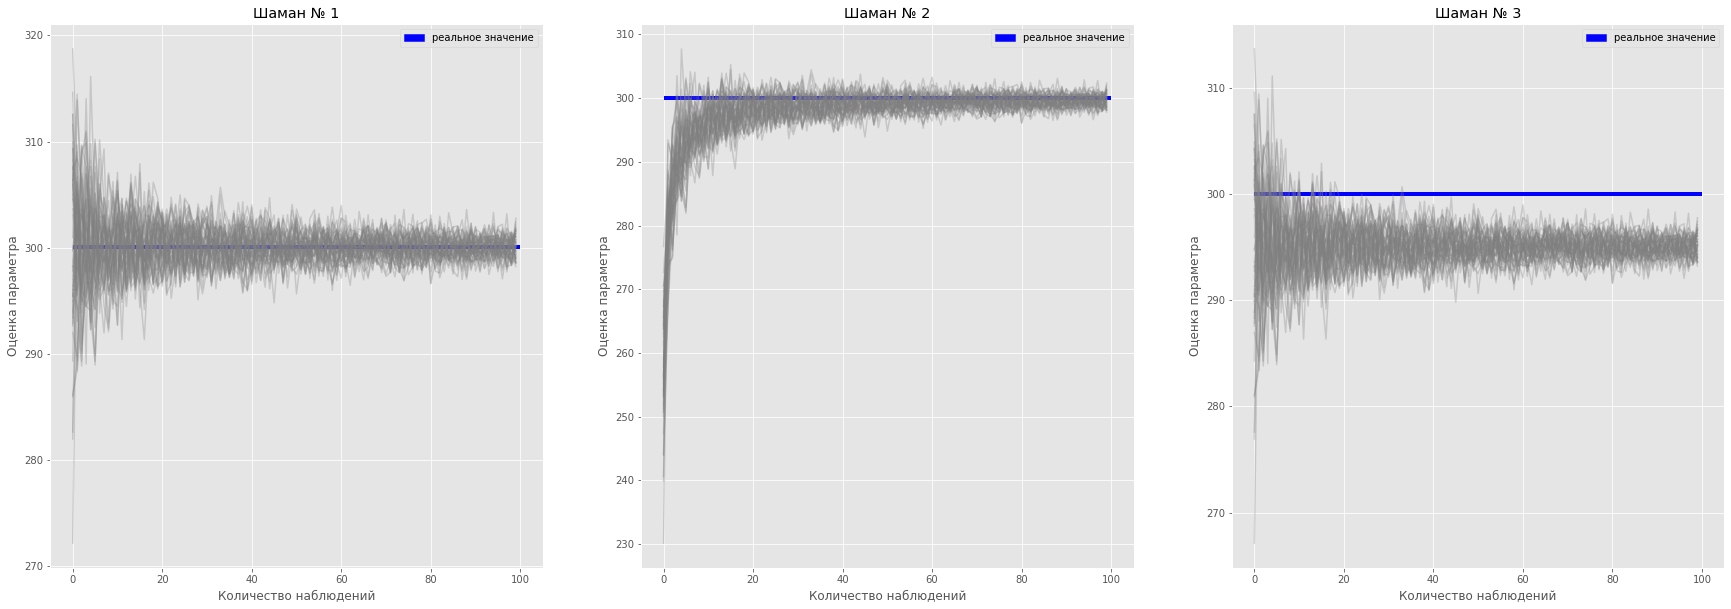

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
import matplotlib.patches as mpatches
for id, data in enumerate([theta_hat1, theta_hat2, theta_hat3]):
    axes[id].set_title(f'Шаман № {id+1}')
    axes[id].plot(data, c='grey', alpha = 0.3) 
    axes[id].hlines(theta_real, 0, 100, color='blue', lw=4)
    red_patch = mpatches.Patch(color='blue', label='реальное значение')
    axes[id].legend(handles=[red_patch])  
    plt.setp(axes[id], xlabel = 'Количество наблюдений')
    plt.setp(axes[id], ylabel = 'Оценка параметра')


__Ещё раз, ещё раз:__ нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 